In [57]:
import os
import pandas as pd
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt

In [ ]:
data_dir = 'data'
companies = ['CARR', 'NOC', 'NWSA', 'PSA']

data = {}

for com in companies:
    filename = com + '.csv'
    path = os.path.join(data_dir, filename)

    with open(path, 'r') as f:
        data[com] = pd.read_csv(f)

In [ ]:
data['CARR'].head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2020-03-19,11.295,11.295,11.295,11.295,100,0.0,0.0
1,2020-03-20,12.236,12.236,11.295,12.001,2300,0.0,0.0
2,2020-03-23,12.001,12.001,10.824,10.862,18700,0.0,0.0
3,2020-03-24,12.142,12.142,10.824,11.013,96100,0.0,0.0
4,2020-03-25,11.107,12.660,11.107,12.660,19200,0.0,0.0


In [14]:
type(data['CARR']['Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [13]:
for com in companies:
    data[com]['Date'] = pd.to_datetime(data[com]['Date'])

In [19]:
# TASK 1
for com in companies:
    print(
        f"Company {com} has no difference between high and low coolumns:",
        (data[com]["High"] == data[com]["Low"]).all(),
    )

# On days wher there is no difference between high and low columns the stock price didn't move likely implying that the stock wasn't traded on that day

Company CARR has no difference between high and low coolumns: False
Company NOC has no difference between high and low coolumns: False
Company NWSA has no difference between high and low coolumns: False
Company PSA has no difference between high and low coolumns: False


In [22]:
# TASK 2
for com in companies:
    print(f'The highest price {com} recorded was:', data[com]['High'].max())
    print(f'The lowest price {com} recorded was:', data[com]['High'].min())
    print()

The highest price CARR recorded was: 56.241
The lowest price CARR recorded was: 11.295

The highest price NOC recorded was: 538.722
The lowest price NOC recorded was: 203.031

The highest price NWSA recorded was: 27.04
The lowest price NWSA recorded was: 7.951

The highest price PSA recorded was: 369.786
The lowest price PSA recorded was: 140.592



In [37]:
# TASK 3
for com in companies:
    data[com]["Log returns"] = np.log(
        data[com]["Close"].diff() + 0.00001
    )  # i shifted the values slightly in order to not get -inf when applying the log function
    print(com)
    print(data[com]["Log returns"].aggregate(["min", "max", "mean", np.std]))
    print()

# !!! ADD SKEWNESS

CARR
min    -11.512925
max      1.231396
mean    -0.974693
std      1.337549
Name: Log returns, dtype: float64

NOC
min    -4.709420
max     3.529884
mean    0.749727
std     1.190507
Name: Log returns, dtype: float64

NWSA
min    -11.512925
max      0.330749
mean    -2.412120
std      2.126143
Name: Log returns, dtype: float64

PSA
min    -4.960418
max     2.816845
mean    0.211160
std     1.183558
Name: Log returns, dtype: float64



c:\Users\svest\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\svest\AppData\Local\Temp\ipykernel_12732\1344518879.py:7: FutureWarning: The provided callable <function std at 0x00000255C0096160> is currently using Series.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  print(data[com]["Log returns"].aggregate(["min", "max", "mean", np.std]))


In [ ]:
# TASK 4
for com in companies:
    gain_idx = data[com]['Log returns'].nlargest(2).index[1]
    loss_idx = data[com]['Log returns'].nsmallest(2).index[1]
    print(com, 'encountered the second highest gain on:', data[com]['Date'].iloc[gain_idx])
    print(com, 'encountered the second highest loss on:', data[com]['Date'].iloc[loss_idx])
    print()

# !!! Check if multiple values fit keep = all

CARR encountered the second highest gain on: 2022-11-10 00:00:00
CARR encountered the second highest loss on: 2021-12-15 00:00:00

NOC encountered the second highest gain on: 2022-02-28 00:00:00
NOC encountered the second highest loss on: 2022-01-19 00:00:00

NWSA encountered the second highest gain on: 2020-05-08 00:00:00
NWSA encountered the second highest loss on: 2017-02-14 00:00:00

PSA encountered the second highest gain on: 2022-02-02 00:00:00
PSA encountered the second highest loss on: 2018-01-11 00:00:00



In [ ]:
# TASK 5


In [56]:
# TASK 6
returns = {}
for com in companies:
    ret = (data[com]['Close'][len(data[com]) - 1] - data[com]['Close'][0]) / data[com]['Close'][0]
    returns[ret] = com

key = min(returns, key = returns.get)
print(returns[key], 'had the lowest returns')


CARR had the lowest returns


In [ ]:
# TASK 7

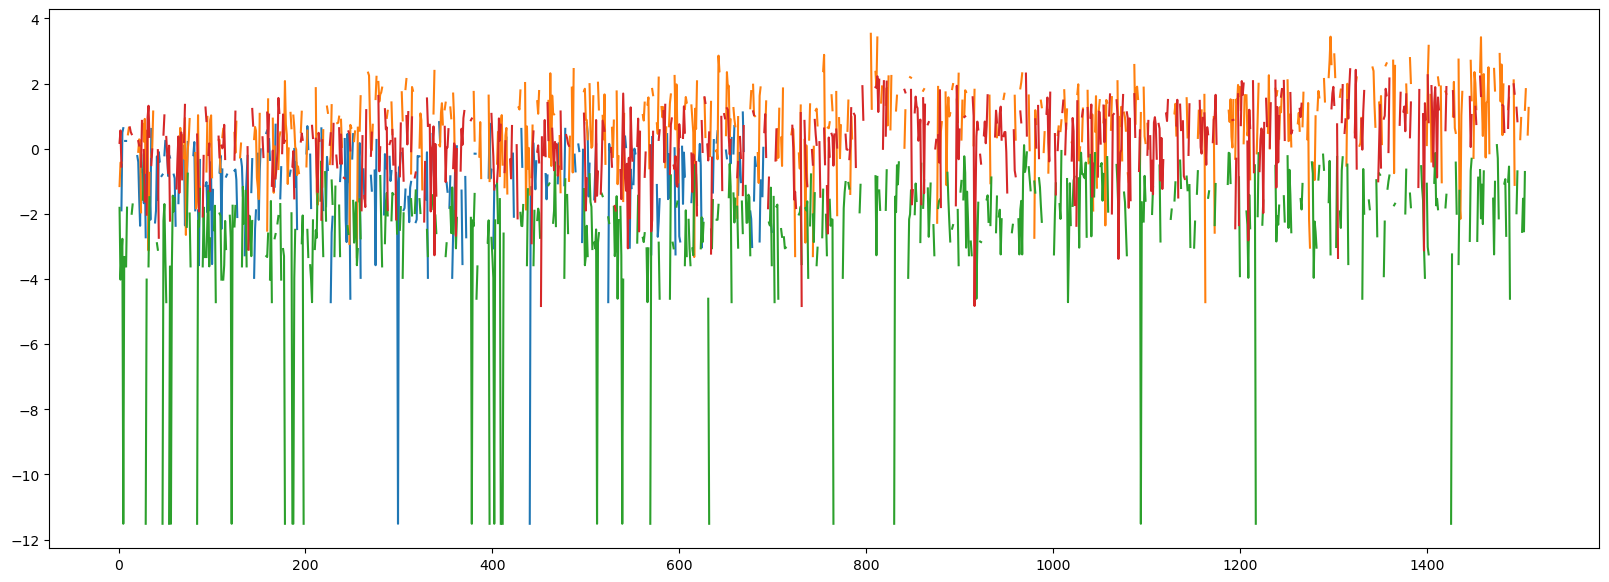

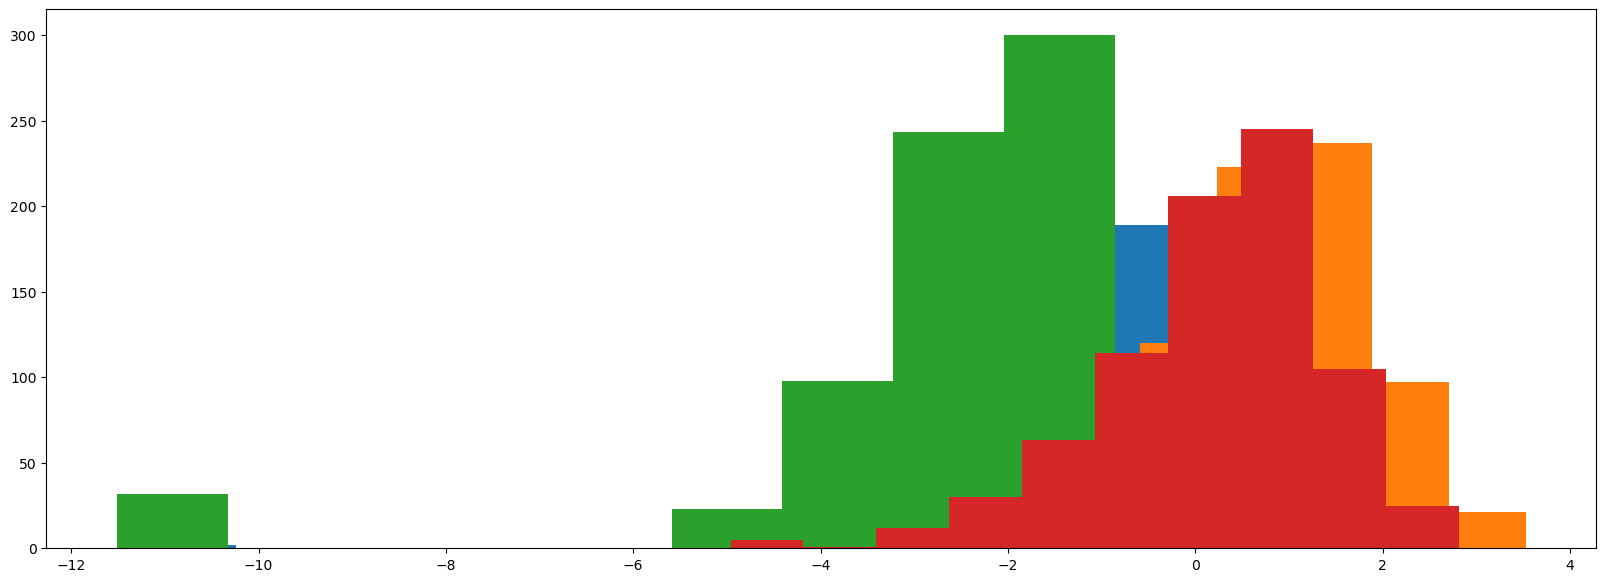

In [59]:
# TASK 8
plt.subplots(1,1, figsize = (20,7))
for com in companies:
    plt.plot(data[com]['Log returns'])

plt.subplots(1,1, figsize = (20,7))
for com in companies:
    plt.hist(data[com]['Log returns'])